<a href="https://colab.research.google.com/github/joanglaunes/BME_Math_Advanced/blob/main/project_textures_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BME-Paris Master - UE Math 2

# Project: Texture analysis and synthesis

$\def\R{{\mathbb R}}
\def\Z{{\mathbb Z}}
\newcommand{\x}{{\bf x}}
\newcommand{\y}{{\bf y}}
\newcommand{\z}{{\bf z}}
\def\rw{\rightarrow}$

This project is dedicated to the study of models of textures for 2D images.
It follows the last practical session on Fourier transforms of images.

## Discrete spot noise

As we have seen during the practical sessions, a gray level image of size $M*N$ is described in Python as a $M*N$ matrix of scalar values, where each entry in the matrix gives the intensity of the corresponding pixel. Mathematically, such an image is described as an application from $\Omega=\{0,\ldots,M-1\}\times\{0,\ldots,N-1\}$ to $\R$, or equivalently from $\Z^2$ to $\R$ if we consider its periodic extension.

The _discrete spot noise_ is a random process that adds up several random shifts of a given image. Using mathematical notations, if $h$ is the original image, a discrete spot noise of $h$ is a random image such that for every $x\in\Omega$,
$$H(x)=\sum_{i=1}^nh(x+T_i),$$
where $T_i$ are independent random variables with uniform distributions in $\Omega$. Note that when $x+T$ does not belong to $\Omega$, the value of $h(x+T)$ is computed by periodization, which implies that the translated image has a blocky aspect as in the figure below.

| <img src="attachment:9527b8b6-bdf1-4364-a9c2-87bbdf16fee2.png" width="250"/> | <img src="attachment:538be64a-fece-40cc-94ae-d2771f058c97.png" width="250"/> | <img src="attachment:304f13f2-ecdf-421e-a8f9-d5a1fddb0526.png" width="250"/> |
| --------------------------------- | ---------------------------------- | ------------------------------------------- |
|          Original image           |                                    |              Translated image               |


The following function `ImTranslate(h,tau)` computes the translated image $h_\tau:x\mapsto h(x+\tau)$ from an image $h:\Omega\rw\R$ and a position $\tau\in\Omega$:

In [ ]:
def ImTranslate(h,tau):
    M,N = h.shape
    ind0 = np.concatenate((np.arange(tau[0],M),np.arange(tau[0])))
    ind1 = np.concatenate((np.arange(tau[1],N),np.arange(tau[1])))
    h_tau = h[ind0,:][:,ind1]
    return h_tau

You can test this function with the following commands:

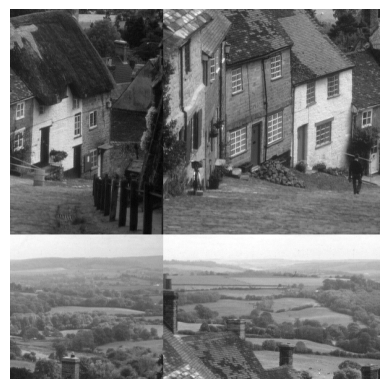

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
h = plt.imread('hill.png')
h = ImTranslate(h,[200,300])
plt.imshow(h, cmap="gray");
plt.axis("off")
plt.show()

__1)__ Write a function `DSN(h,n)` which from an image $h$ computes a realization $H$ of the discrete spot noise of $h$.
Test this function on each of the test images for $n=10$, $n=100$, $n=1000$ and display the results in each case.

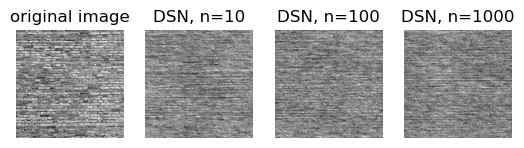

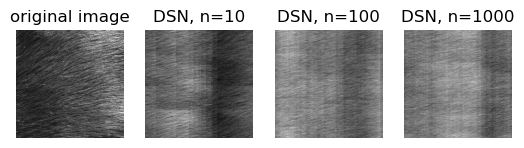

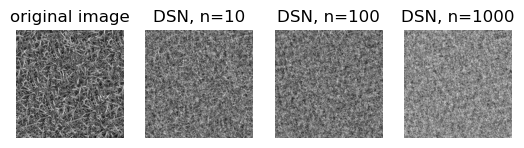

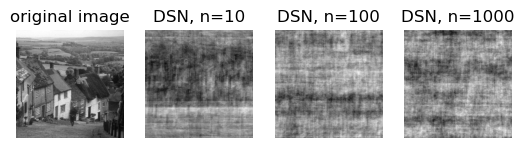

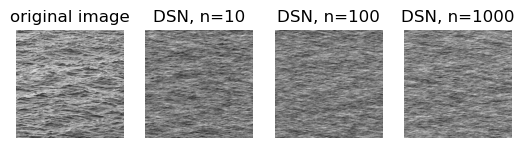

In [ ]:
def DSN(h,n):
    M, N = h.shape
    H = np.zeros((M,N))
    for k in range(n):
        tau = np.random.randint(M), np.random.randint(N)
        H += ImTranslate(h,tau)
    return H

for imfile in ("briques", "hair", "herbe", "hill", "sea"):
    h = plt.imread(f'{imfile}.png')
    plt.subplot(1,4,1)
    plt.imshow(h, cmap="gray"); plt.axis("off")
    plt.title("original image")
    for k,n in enumerate((10,100,1000)):
        H = DSN(h,n)
        plt.subplot(1,4,k+2)
        plt.imshow(H, cmap="gray"); plt.axis("off")
        plt.title(f"DSN, n={n}")
    plt.show()

## Discrete Fourier transforms and convolutions

Let $f$ and $g$ be two discrete grayscale images of size $M*N$. The convolution of $f$ and $g$ is the image $f*g$ defined by
$$\forall x\in\Omega, \quad (f*g)(x) = \sum_{y\in\Omega}f(y)g(x-y).$$

__2)__ Show that for any images $f$ and $g$, the image $f*g$ satisfies
$$\forall \nu\in\Omega,\quad\widehat{f*g}(\nu)=\hat f(\nu) \hat g(\nu),$$
where $\hat f$ denotes the discrete Fourier transform of any image $f$.

This formula gives an alternative way to compute convolutions: $f*g$ can be computed by taking Fourier transforms of $f$ and $g$, multiplying them, and taking the inverse Fourier transform of the result. Because Fourier transforms can be computed very fast, this is usually much faster than using the direct formula.

__3)__ Write a function `ImConvolve(f,g)` which computes the convolution $h$ of two images $f$ and $g$ of same size using this idea.

In [ ]:
def ImConvolve(f,g):
    fhat = np.fft.fft2(f)
    ghat = np.fft.fft2(g)
    fghat = fhat*ghat
    fg = np.real(np.fft.ifft2(fghat))
    return fg

## Asymptotic discrete spot noise (ADSN)

In this part we will consider a different random model which will in fact correspond to the limit of the DSN model as $n$ tends to $\infty$.

We start with a grayscale image $h$ of size $M*N$, as in the previous section, and we first define the renormalized image
$$\tilde h(x)=\frac1{\sqrt{MN}}(h(x)-m),$$
where $m$ is the mean value of all pixel intensities of image $h$.
The asymptotic discrete spot noise model is defined as
$$Z=\tilde h*Y,$$
where $Y$ is a gaussian white noise image, i.e. a random image $Y$ whose pixel intensities $Y(x)$ for $x\in\Omega$ are independant random variables with distribution $\mathcal{N}(0,1)$. Such an image $Y$ can be obtained in Python using the function `np.random.randn`.

__4)__ Write a function `ADSN(h)` which simulates the ADSN model and returns a realization of $Z$.  Test this function with the test images and observe the similitudes with the DSN model for large $n$.

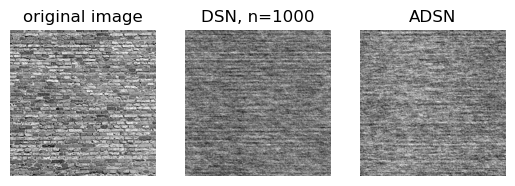

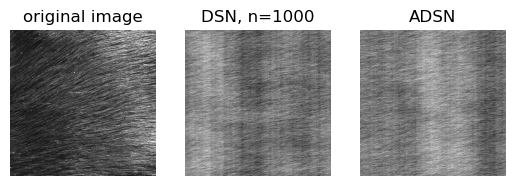

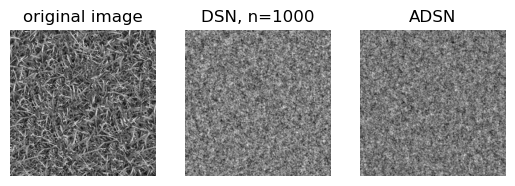

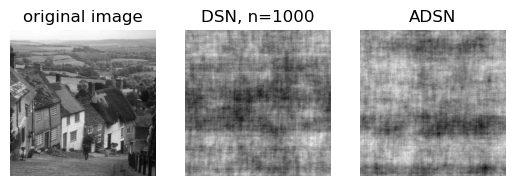

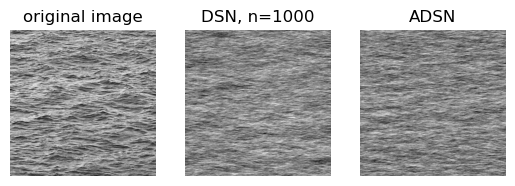

In [ ]:
def ADSN(h):
    M, N = h.shape
    htilde = (h-np.mean(h))/np.sqrt(M*N)
    Y = np.random.randn(M,N)
    Z = ImConvolve(htilde,Y)
    return Z

for imfile in ("briques", "hair", "herbe", "hill", "sea"):
    h = plt.imread(f'{imfile}.png')
    plt.subplot(1,3,1)
    plt.imshow(h, cmap="gray"); plt.axis("off")
    plt.title("original image")
    H = DSN(h,1000)
    plt.subplot(1,3,2)
    plt.imshow(H, cmap="gray"); plt.axis("off")
    plt.title("DSN, n=1000")
    plt.subplot(1,3,3)
    Z = ADSN(h)
    plt.imshow(Z, cmap="gray"); plt.axis("off")
    plt.title("ADSN")
    plt.show()